In [1]:
import matplotlib
%matplotlib inline
import seaborn as sns
from dummyPy import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from datetime import datetime, timedelta
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
# library imports
import numpy as np
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from datetime import datetime, timedelta
from sklearn.metrics import roc_auc_score

#from sklearn.preprocessing import CategoricalEncoder
 
import time

In [4]:
# Load Train and Test CSV

headerNames = ["id","name","first","last","compas_screening_date","sex","dob","age",
               "age_cat","race","juv_fel_count","decile_score","juv_misd_count","juv_other_count",
               "priors_count","days_b_screening_arrest","c_jail_in","c_jail_out","c_case_number",
               "c_offense_date","c_arrest_date","c_days_from_compas","c_charge_degree","c_charge_desc",
               "is_recid","num_r_cases","r_case_number","r_charge_degree","r_days_from_arrest",
               "r_offense_date","r_charge_desc","r_jail_in","r_jail_out","is_violent_recid","num_vr_cases",
               "vr_case_number","vr_charge_degree","vr_offense_date","vr_charge_desc","v_type_of_assessment",
               "v_decile_score","v_score_text","v_screening_date","type_of_assessment","decile_score",
               "score_text","screening_date"]
prefix = "./data/"

# ID cannot be used for prediction 
# hence setting index_col = 0 takes care of removing ID field from dataset in both train and test dataframes.
datadf = pd.read_csv(prefix + "compas-scores.csv", header=None, delim_whitespace=False,  names=headerNames, index_col=0,skiprows=1) 



In [5]:
## Drop columns not useful at all

if 'id' in datadf:
    datadf = datadf.drop('id', axis=1)
    
if 'name' in datadf: 
    datadf = datadf.drop('name', axis=1)
    
if 'first' in datadf:
    datadf = datadf.drop('first', axis=1)
    
if 'last' in datadf:
    datadf = datadf.drop('last', axis=1)

if 'c_case_number' in datadf:
    datadf = datadf.drop('c_case_number', axis=1)

if 'r_case_number' in datadf:
    datadf = datadf.drop('r_case_number', axis=1)

if 'vr_case_number' in datadf:
    datadf = datadf.drop('vr_case_number', axis=1)

    
if 'decile_score.1' in datadf:
    datadf = datadf.drop('decile_score.1', axis=1)


if 'c_charge_desc' in datadf:
    datadf = datadf.drop('c_charge_desc', axis=1)


if 'r_charge_desc' in datadf:
    datadf = datadf.drop('r_charge_desc', axis=1)

if 'vr_charge_desc' in datadf:
    datadf = datadf.drop('vr_charge_desc', axis=1)


if 'num_r_cases' in datadf:
    datadf = datadf.drop('num_r_cases', axis=1)

if 'num_vr_cases' in datadf:
    datadf = datadf.drop('num_vr_cases', axis=1)


if 'v_score_text' in datadf:
    datadf = datadf.drop('v_score_text', axis=1)

if 'dob' in datadf:
    datadf = datadf.drop('dob', axis=1)

if 'vr_charge_degree' in datadf:
    datadf = datadf.drop('vr_charge_degree', axis=1)
    
if 'c_charge_degree' in datadf:
    datadf = datadf.drop('c_charge_degree', axis=1)

if 'r_charge_degree' in datadf:
    datadf = datadf.drop('r_charge_degree', axis=1)

if 'c_charge_degree' in datadf:
    datadf = datadf.drop('c_charge_degree', axis=1)

## check
if 'v_decile_score' in datadf:
    datadf = datadf.drop('v_decile_score', axis=1)


if 'c_jail_out' in datadf:
    datadf = datadf.drop('c_jail_out', axis=1)

if 'r_jail_out' in datadf:
    datadf = datadf.drop('r_jail_out', axis=1)

## days_b_screening_arrest, c_days_from_compas ,r_days_from_arrest 
if 'days_b_screening_arrest' in datadf:
    datadf = datadf.drop('days_b_screening_arrest', axis=1)


if 'c_days_from_compas' in datadf:
    datadf = datadf.drop('c_days_from_compas', axis=1)

if 'r_days_from_arrest' in datadf:
    datadf = datadf.drop('r_days_from_arrest', axis=1)



In [6]:

print(datadf.shape)


(11757, 23)


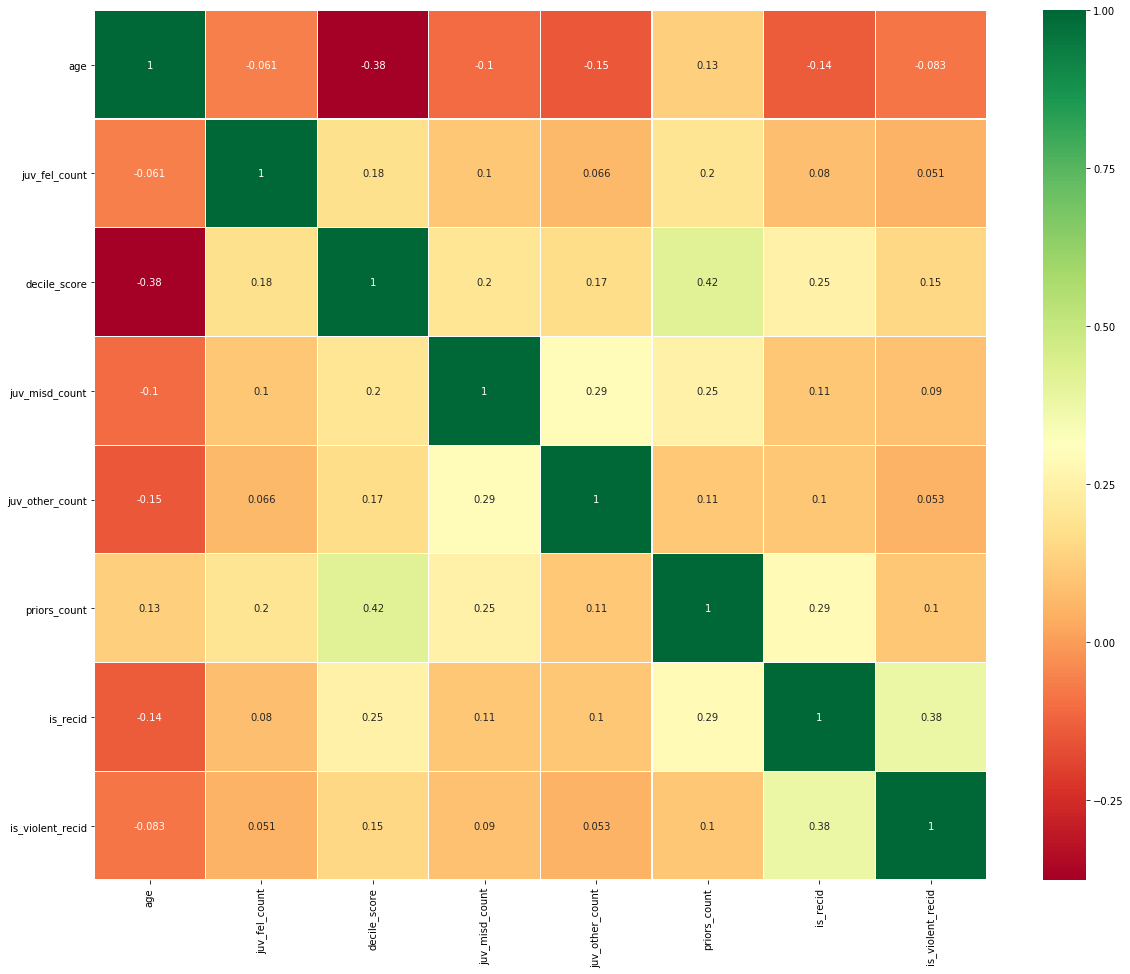

In [7]:
sns.heatmap(datadf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,16)
#plt.show()
fig.savefig('Correlation_before.png')

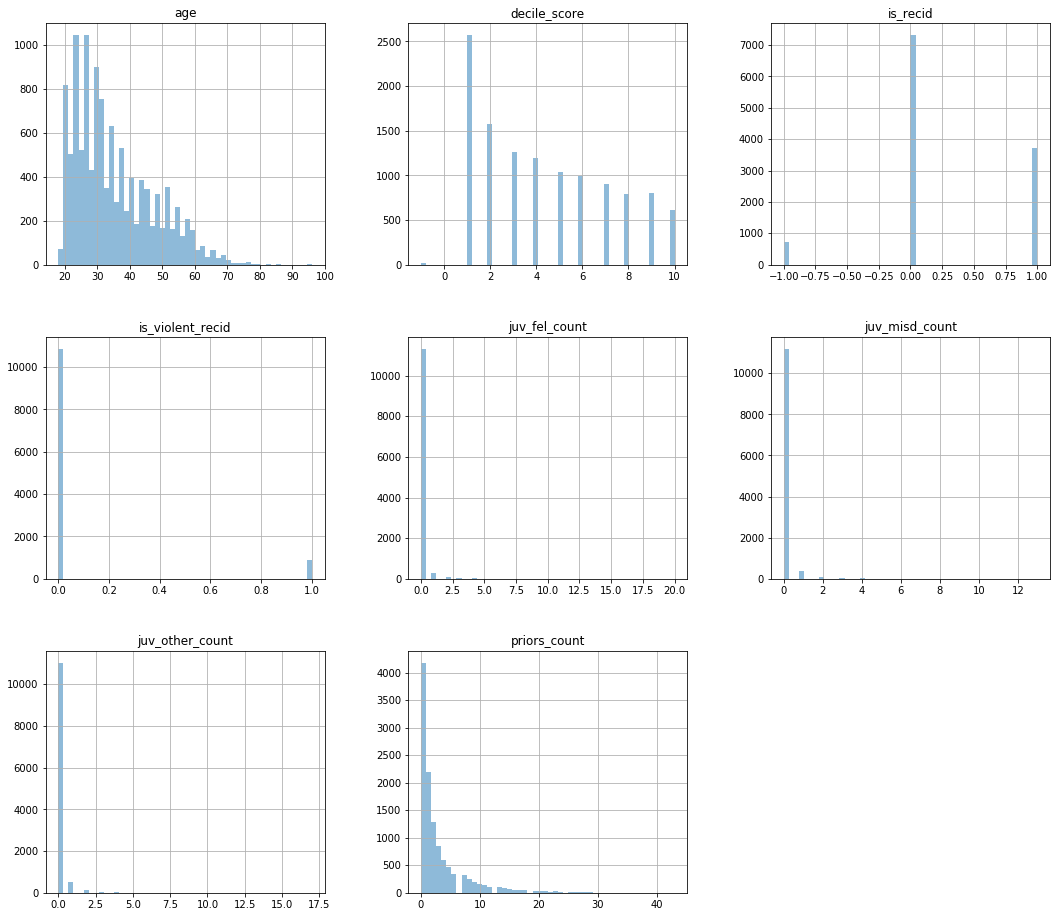

In [8]:
fig=plt.gcf()
datadf.hist(figsize=(18, 16), alpha=0.5, bins=50)
plt.show()
fig.savefig('histograms1.png')

In [9]:
datadf.head(10)

,compas_screening_date,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,...,is_recid,r_offense_date,r_jail_in,is_violent_recid,vr_offense_date,v_type_of_assessment,v_screening_date,type_of_assessment,score_text,screening_date
id,,,,,,,,,,,,,,,,,,,,,
1,2013-08-14,Male,69,Greater than 45,Other,0,1,0,0,0,...,0,NaN,NaN,0,NaN,Risk of Violence,2013-08-14,Risk of Recidivism,Low,2013-08-14
2,2014-12-31,Male,31,25 - 45,Caucasian,0,5,0,0,0,...,-1,NaN,NaN,0,NaN,Risk of Violence,2014-12-31,Risk of Recidivism,Medium,2014-12-31
3,2013-01-27,Male,34,25 - 45,African-American,0,3,0,0,0,...,1,2013-07-05,NaN,1,2013-07-05,Risk of Violence,2013-01-27,Risk of Recidivism,Low,2013-01-27
4,2013-04-14,Male,24,Less than 25,African-American,0,4,0,1,4,...,1,2013-06-16,2013-06-16,0,NaN,Risk of Violence,2013-04-14,Risk of Recidivism,Low,2013-04-14
5,2013-01-13,Male,23,Less than 25,African-American,0,8,1,0,1,...,0,NaN,NaN,0,NaN,Risk of Violence,2013-01-13,Risk of Recidivism,High,2013-01-13
6,2013-03-26,Male,43,25 - 45,Other,0,1,0,0,2,...,0,NaN,NaN,0,NaN,Risk of Violence,2013-03-26,Risk of Recidivism,Low,2013-03-26
7,2013-11-30,Male,44,25 - 45,Other,0,1,0,0,0,...,0,NaN,NaN,0,NaN,Risk of Violence,2013-11-30,Risk of Recidivism,Low,2013-11-30
8,2014-02-19,Male,41,25 - 45,Caucasian,0,6,0,0,14,...,1,2014-03-31,2014-03-31,0,NaN,Risk of Violence,2014-02-19,Risk of Recidivism,Medium,2014-02-19
9,2013-08-30,Male,43,25 - 45,Other,0,4,0,0,3,...,0,NaN,NaN,0,NaN,Risk of Violence,2013-08-30,Risk of Recidivism,Low,2013-08-30


In [10]:
## fill NaN for categorical

#datadf['v_score_text'].fillna(datadf['v_score_text'].value_counts().index[0], inplace=True)
#datadf['vr_charge_degree'].fillna(datadf['vr_charge_degree'].value_counts().index[0], inplace=True)
#datadf['c_charge_desc'].fillna(datadf['c_charge_desc'].value_counts().index[0], inplace=True)
#datadf['r_charge_desc'].fillna(datadf['r_charge_desc'].value_counts().index[0], inplace=True)
#datadf['vr_charge_desc'].fillna(datadf['vr_charge_desc'].value_counts().index[0], inplace=True)


In [11]:
'''
datadf['vr_charge_degree'] = datadf['vr_charge_degree'].str.replace('[^a-zA-Z]',' ')
datadf['vr_charge_degree'] = datadf['vr_charge_degree'].str.replace('[^a-zA-Z]',' ')

datadf['v_score_text'] = datadf['v_score_text'].str.replace('[^a-zA-Z]',' ')
datadf['v_score_text'] = datadf['v_score_text'].str.replace('[^a-zA-Z]',' ')
'''

"\ndatadf['vr_charge_degree'] = datadf['vr_charge_degree'].str.replace('[^a-zA-Z]',' ')\ndatadf['vr_charge_degree'] = datadf['vr_charge_degree'].str.replace('[^a-zA-Z]',' ')\n\ndatadf['v_score_text'] = datadf['v_score_text'].str.replace('[^a-zA-Z]',' ')\ndatadf['v_score_text'] = datadf['v_score_text'].str.replace('[^a-zA-Z]',' ')\n"

In [12]:
if 'age' in datadf:
    datadf = datadf.drop('age', axis=1)


In [13]:
encoder = OneHotEncoder(["sex", "race", "v_type_of_assessment", "age_cat", 
                         "type_of_assessment"]) # ,"v_score_text","c_charge_desc","r_charge_desc", "vr_charge_desc",
encoder.fit(datadf)
encoder.transform(datadf).shape
encoder.transform(datadf).head(10)

,compas_screening_date,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Caucasian,race_Hispanic,...,is_recid,r_offense_date,r_jail_in,is_violent_recid,vr_offense_date,v_type_of_assessment_Risk of Violence,v_screening_date,type_of_assessment_Risk of Recidivism,score_text,screening_date
0,2013-08-14,0,1,0,1,0,0,0,0,0,...,0,NaN,NaN,0,NaN,1,2013-08-14,1,Low,2013-08-14
1,2014-12-31,0,1,1,0,0,0,0,1,0,...,-1,NaN,NaN,0,NaN,1,2014-12-31,1,Medium,2014-12-31
2,2013-01-27,0,1,1,0,0,1,0,0,0,...,1,2013-07-05,NaN,1,2013-07-05,1,2013-01-27,1,Low,2013-01-27
3,2013-04-14,0,1,0,0,1,1,0,0,0,...,1,2013-06-16,2013-06-16,0,NaN,1,2013-04-14,1,Low,2013-04-14
4,2013-01-13,0,1,0,0,1,1,0,0,0,...,0,NaN,NaN,0,NaN,1,2013-01-13,1,High,2013-01-13
5,2013-03-26,0,1,1,0,0,0,0,0,0,...,0,NaN,NaN,0,NaN,1,2013-03-26,1,Low,2013-03-26
6,2013-11-30,0,1,1,0,0,0,0,0,0,...,0,NaN,NaN,0,NaN,1,2013-11-30,1,Low,2013-11-30
7,2014-02-19,0,1,1,0,0,0,0,1,0,...,1,2014-03-31,2014-03-31,0,NaN,1,2014-02-19,1,Medium,2014-02-19
8,2013-08-30,0,1,1,0,0,0,0,0,0,...,0,NaN,NaN,0,NaN,1,2013-08-30,1,Low,2013-08-30
9,2014-03-16,1,0,1,0,0,0,0,1,0,...,0,NaN,NaN,0,NaN,1,2014-03-16,1,Low,2014-03-16


In [14]:
datadf = encoder.transform(datadf)

print("DF shape >>>>>>>>>>>>>>>> ",datadf.shape)
print("DF columsn >>>>>>>>>>>>>>>> ",datadf.columns)


DF shape >>>>>>>>>>>>>>>>  (11757, 30)
DF columsn >>>>>>>>>>>>>>>>  Index(['compas_screening_date', 'sex_Female', 'sex_Male', 'age_cat_25 - 45',
       'age_cat_Greater than 45', 'age_cat_Less than 25',
       'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other', 'juv_fel_count',
       'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'c_jail_in', 'c_offense_date', 'c_arrest_date', 'is_recid',
       'r_offense_date', 'r_jail_in', 'is_violent_recid', 'vr_offense_date',
       'v_type_of_assessment_Risk of Violence', 'v_screening_date',
       'type_of_assessment_Risk of Recidivism', 'score_text',
       'screening_date'],
      dtype='object')


In [1]:
'''# Set of Unique Values 
print(traindf['sex'].unique())
print(traindf['age_cat'].unique())
print(traindf['race'].unique())
print(traindf['score_text'].unique())
print(traindf['r_charge_desc'].unique())
print(traindf['c_charge_desc'].unique())
print(traindf['c_charge_degree'].unique())
print(traindf['r_charge_degree'].unique())
print(traindf['r_charge_desc'].unique())
print(traindf['vr_charge_desc'].unique())
print(traindf['v_type_of_assessment'].unique())
print(traindf['v_score_text'].unique())
print(traindf['score_text'].unique())



traindf.columns
'''

"# Set of Unique Values \nprint(traindf['sex'].unique())\nprint(traindf['age_cat'].unique())\nprint(traindf['race'].unique())\nprint(traindf['score_text'].unique())\nprint(traindf['r_charge_desc'].unique())\nprint(traindf['c_charge_desc'].unique())\nprint(traindf['c_charge_degree'].unique())\nprint(traindf['r_charge_degree'].unique())\nprint(traindf['r_charge_desc'].unique())\nprint(traindf['vr_charge_desc'].unique())\nprint(traindf['v_type_of_assessment'].unique())\nprint(traindf['v_score_text'].unique())\nprint(traindf['score_text'].unique())\n\n\n\ntraindf.columns\n"

In [17]:
# Test Data stats
datadf.describe()

,compas_screening_date,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Caucasian,race_Hispanic,...,is_recid,r_offense_date,r_jail_in,is_violent_recid,vr_offense_date,v_type_of_assessment_Risk of Violence,v_screening_date,type_of_assessment_Risk of Recidivism,score_text,screening_date
count,11757,11757.0,11757.0,11757.0,11757.0,11757.0,11757.0,11757.0,11757.0,11757.0,...,11757,3703,2460,11757,882,11757.0,11757,11757.0,11742,11757
unique,704,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3,1090,984,2,599,1.0,704,1.0,3,704
top,2013-03-20,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2014-12-08,2014-05-27,0,2015-08-15,1.0,2013-03-20,1.0,Low,2013-03-20
freq,39,9336.0,9336.0,6649.0,9089.0,9317.0,5944.0,11699.0,7672.0,10657.0,...,7335,12,9,10875,6,11757.0,39,11757.0,6607,39


In [18]:
# age for different date fields 
#datadf['dob'] = pd.to_datetime(datadf['dob'], dayfirst=True)
datadf['compas_screening_date'] = pd.to_datetime(datadf['compas_screening_date'], dayfirst=True)

datadf['c_offense_date'] = pd.to_datetime(datadf['c_offense_date'], dayfirst=True)
datadf['c_arrest_date'] = pd.to_datetime(datadf['c_arrest_date'], dayfirst=True)
datadf['r_offense_date'] = pd.to_datetime(datadf['r_offense_date'], dayfirst=True)


datadf['vr_offense_date'] = pd.to_datetime(datadf['vr_offense_date'], dayfirst=True)
datadf['v_screening_date'] = pd.to_datetime(datadf['v_screening_date'], dayfirst=True)
datadf['screening_date'] = pd.to_datetime(datadf['screening_date'], dayfirst=True)

datadf['c_jail_in'] = pd.to_datetime(datadf['c_jail_in'], dayfirst=True)
#datadf['c_jail_out'] = pd.to_datetime(datadf['c_jail_out'], dayfirst=True)

datadf['r_jail_in'] = pd.to_datetime(datadf['r_jail_in'], dayfirst=True)
#datadf['r_jail_out'] = pd.to_datetime(datadf['r_jail_out'], dayfirst=True)

## ages
#datadf['Age_in_days'] = (datadf['compas_screening_date']-datadf['dob'])/timedelta(days=1)
datadf['c_offense_age_in_days'] = (datadf['compas_screening_date']-datadf['c_offense_date'])/timedelta(days=1)
datadf['c_arrest_age_in_days'] = (datadf['compas_screening_date']-datadf['c_arrest_date'])/timedelta(days=1)

datadf['r_offense_age_in_days'] = (datadf['compas_screening_date']-datadf['r_offense_date'])/timedelta(days=1)
datadf['vr_offense_age_in_days'] = (datadf['compas_screening_date']-datadf['vr_offense_date'])/timedelta(days=1)
datadf['v_screening_age_in_days'] = (datadf['compas_screening_date']-datadf['v_screening_date'])/timedelta(days=1)
datadf['screening_age_in_days'] = (datadf['compas_screening_date']-datadf['screening_date'])/timedelta(days=1)


datadf['c_jail_in_age_in_days'] = (datadf['compas_screening_date']-datadf['c_jail_in'])/timedelta(days=1)
#datadf['c_jail_out_age_in_days'] = (datadf['compas_screening_date']-datadf['c_jail_out'])/timedelta(days=1)


datadf['r_jail_in_age_in_days'] = (datadf['compas_screening_date']-datadf['r_jail_in'])/timedelta(days=1)
#datadf['r_jail_out_age_in_days'] = (datadf['compas_screening_date']-datadf['r_jail_out'])/timedelta(days=1)


## drop all date cols
if 'dob' in datadf:
    datadf = datadf.drop('dob', axis=1)
    
if 'compas_screening_date' in datadf:
    datadf = datadf.drop('compas_screening_date', axis=1)

if 'c_offense_date' in datadf:
    datadf = datadf.drop('c_offense_date', axis=1)

if 'c_arrest_date' in datadf:
    datadf = datadf.drop('c_arrest_date', axis=1)

if 'r_offense_date' in datadf:
    datadf = datadf.drop('r_offense_date', axis=1)

if 'vr_offense_date' in datadf:
    datadf = datadf.drop('vr_offense_date', axis=1)

if 'screening_date' in datadf:
    datadf = datadf.drop('screening_date', axis=1)


if 'v_screening_date' in datadf:
    datadf = datadf.drop('v_screening_date', axis=1)


if 'c_jail_in' in datadf:
    datadf = datadf.drop('c_jail_in', axis=1)

if 'c_jail_out' in datadf:
    datadf = datadf.drop('c_jail_out', axis=1)


if 'r_jail_in' in datadf:
    datadf = datadf.drop('r_jail_in', axis=1)

if 'r_jail_out' in datadf:
    datadf = datadf.drop('r_jail_out', axis=1)


#prediction column - textual (decile_score is the numeric equivalent)
if 'score_text' in datadf:
    datadf = datadf.drop('score_text', axis=1)



In [19]:
# stats of categorical features
datadf.describe(include=['O'])



,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,v_type_of_assessment_Risk of Violence,type_of_assessment_Risk of Recidivism
count,11757.0,11757.0,11757.0,11757.0,11757.0,11757.0,11757.0,11757.0,11757.0,11757.0,11757.0,11757,11757,11757,11757,11757,11757,11757,11757.0,11757.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,12,11,11,12,39,3,2,1.0,1.0
top,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1.0,1.0
freq,9336.0,9336.0,6649.0,9089.0,9317.0,5944.0,11699.0,7672.0,10657.0,11717.0,11096.0,11334,2577,11199,11030,4184,7335,10875,11757.0,11757.0


In [20]:
print(datadf.shape)
datadf.head(10)

(11757, 28)


,sex_Female,sex_Male,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,...,v_type_of_assessment_Risk of Violence,type_of_assessment_Risk of Recidivism,c_offense_age_in_days,c_arrest_age_in_days,r_offense_age_in_days,vr_offense_age_in_days,v_screening_age_in_days,screening_age_in_days,c_jail_in_age_in_days,r_jail_in_age_in_days
0,0,1,0,1,0,0,0,0,0,0,...,1,1,1.0,NaN,NaN,NaN,0.0,0.0,0.747431,NaN
1,0,1,1,0,0,0,0,1,0,0,...,1,1,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,0,1,1,0,0,1,0,0,0,0,...,1,1,1.0,NaN,-159.0,-159.0,0.0,0.0,0.843437,NaN
3,0,1,0,0,1,1,0,0,0,0,...,1,1,1.0,NaN,-63.0,NaN,0.0,0.0,0.792662,-63.0
4,0,1,0,0,1,1,0,0,0,0,...,1,1,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
5,0,1,1,0,0,0,0,0,0,0,...,1,1,NaN,76.0,NaN,NaN,0.0,0.0,NaN,NaN
6,0,1,1,0,0,0,0,0,0,0,...,1,1,0.0,NaN,NaN,NaN,0.0,0.0,-0.201597,NaN
7,0,1,1,0,0,0,0,1,0,0,...,1,1,1.0,NaN,-40.0,NaN,0.0,0.0,0.785833,-40.0
8,0,1,1,0,0,0,0,0,0,0,...,1,1,NaN,1.0,NaN,NaN,0.0,0.0,0.628206,NaN
9,1,0,1,0,0,0,0,1,0,0,...,1,1,1.0,NaN,NaN,NaN,0.0,0.0,0.766968,NaN


In [21]:
# for starters, fill every nan value with mean column values across the dataset.

#fill NaN values with mean
#datadf['r_jail_in_age_in_days'].fillna(datadf['r_jail_in_age_in_days'].dropna().mean(), inplace=True) 
datadf[:] = datadf[:].fillna(0)
'''
datadf['r_jail_in_age_in_days'].fillna(0) 
datadf['r_jail_out_age_in_days'].fillna(0) 
datadf['c_jail_in_age_in_days'].fillna(0) 
datadf['c_jail_out_age_in_days'].fillna(0) 

datadf['vr_offense_age_in_days'].fillna(0) 
datadf['r_offense_age_in_days'].fillna(0) 
datadf['c_arrest_age_in_days'].fillna(0) 
datadf['c_offense_age_in_days'].fillna(0) 
'''



"\ndatadf['r_jail_in_age_in_days'].fillna(0) \ndatadf['r_jail_out_age_in_days'].fillna(0) \ndatadf['c_jail_in_age_in_days'].fillna(0) \ndatadf['c_jail_out_age_in_days'].fillna(0) \n\ndatadf['vr_offense_age_in_days'].fillna(0) \ndatadf['r_offense_age_in_days'].fillna(0) \ndatadf['c_arrest_age_in_days'].fillna(0) \ndatadf['c_offense_age_in_days'].fillna(0) \n"

In [22]:
datadf.to_csv('datadf_dt.csv', index=False)

In [23]:
# check if any null values are still present
print(datadf.columns[datadf.isnull().any()].tolist())

[]


In [24]:
#sample data for a quick run ## TODO removenext line
traindf, testdf = train_test_split(datadf, random_state=42, test_size=0.3)

print(traindf.shape)
print(testdf.shape)

(8229, 28)
(3528, 28)


In [25]:
from sklearn import preprocessing
print(traindf.columns)
print(traindf.columns[traindf.isnull().any()].tolist())



Index(['sex_Female', 'sex_Male', 'age_cat_25 - 45', 'age_cat_Greater than 45',
       'age_cat_Less than 25', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'is_recid', 'is_violent_recid',
       'v_type_of_assessment_Risk of Violence',
       'type_of_assessment_Risk of Recidivism', 'c_offense_age_in_days',
       'c_arrest_age_in_days', 'r_offense_age_in_days',
       'vr_offense_age_in_days', 'v_screening_age_in_days',
       'screening_age_in_days', 'c_jail_in_age_in_days',
       'r_jail_in_age_in_days'],
      dtype='object')
[]


In [26]:
## Prediction model  -TRAIN DF
print(traindf.columns)
train_features = traindf.loc[:, traindf.columns != 'decile_score']

print(train_features.columns)
print(train_features.head(10))

# extract label from training set - Approved
train_label = traindf.loc[:, traindf.columns == 'decile_score']
print(train_label.columns)


## Prediction model - TEST DF
print(traindf.columns)
test_features = testdf.loc[:, testdf.columns != 'decile_score']

print(test_features.columns)
print(test_features.head(10))

# extract label from training set - Approved
test_label = testdf.loc[:, testdf.columns == 'decile_score']
print(test_label.columns)



Index(['sex_Female', 'sex_Male', 'age_cat_25 - 45', 'age_cat_Greater than 45',
       'age_cat_Less than 25', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'is_recid', 'is_violent_recid',
       'v_type_of_assessment_Risk of Violence',
       'type_of_assessment_Risk of Recidivism', 'c_offense_age_in_days',
       'c_arrest_age_in_days', 'r_offense_age_in_days',
       'vr_offense_age_in_days', 'v_screening_age_in_days',
       'screening_age_in_days', 'c_jail_in_age_in_days',
       'r_jail_in_age_in_days'],
      dtype='object')
Index(['sex_Female', 'sex_Male', 'age_cat_25 - 45', 'age_cat_Greater than 45',
       'age_cat_Less than 25', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'juv_fel_count', 'juv_misd_count', 'juv_other_count', 

In [27]:

# define the parameter values that should be searched
n_estimators_range = list(range(80, 100))
#=5, n_estimators=30, min_samples_split=2
# define the parameter values that should be searched
n_range = list(range(1, 31))
max_depth_range = list(range(1,10))
min_samples_split_range = list(range(2,10))
max_features_range = list(range(1,10))

from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
# specify "parameter distributions" rather than a "parameter grid"
model = DecisionTreeClassifier(random_state=42)
print(model.get_params().keys())
param_dict = dict(max_depth=n_range, min_samples_split=min_samples_split_range, max_features=max_features_range)

conv_X = pd.get_dummies(train_features.iloc[:, :]) 
conv_Y = pd.get_dummies(train_label['decile_score']) 
#print(conv_Y)
#print(conv_X)

# n_iter controls the number of searches
#rand = GridSearchCV(model, param_dict, cv=10, scoring='roc_auc',  n_jobs=-1)
rand = RandomizedSearchCV(model, param_dict, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(conv_X, conv_Y)
print("GRID SCORES >>> ",rand.grid_scores_)

# examine the best model
print("BEST SCORE >>> ",rand.best_score_)
print("BEST PARAMETERS >>> ",rand.best_params_)

'''
BEST SCORE >>>  0.0
BEST PARAMETERS >>>  {'n_estimators': 87, 'min_samples_split': 7, 'max_leaf_nodes': 9, 'max_features': 4, 'max_depth': 4, 'criterion': 'gini'}
'''

C:\ProgramData\Anaconda3-5.0.1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3-5.0.1\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])
GRID SCORES >>>  [mean: 0.14886, std: 0.01150, params: {'min_samples_split': 7, 'max_features': 9, 'max_depth': 24}, mean: 0.17791, std: 0.00808, params: {'min_samples_split': 2, 'max_features': 8, 'max_depth': 20}, mean: 0.16017, std: 0.01068, params: {'min_samples_split': 3, 'max_features': 5, 'max_depth': 30}, mean: 0.14230, std: 0.01212, params: {'min_samples_split': 2, 'max_features': 4, 'max_depth': 15}, mean: 0.09005, std: 0.02401, params: {'min_samples_split': 6, 'max_features': 3, 'max_depth': 11}, mean: 0.14254, std: 0.01509, params: {'min_samples_split': 8, 'max_features': 5, 'max_depth': 28}, mean: 0.05031, std: 0.05043, params: {'min_samples_split': 6, 'max_features': 8, 'max_depth': 3}, mean: 0.13015, std: 0.01111, params: {'min_samp

"\nBEST SCORE >>>  0.0\nBEST PARAMETERS >>>  {'n_estimators': 87, 'min_samples_split': 7, 'max_leaf_nodes': 9, 'max_features': 4, 'max_depth': 4, 'criterion': 'gini'}\n"

In [28]:
%%time
#Train the model with best parameters of RF
# best params for RF using randomizedCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


ds_model = make_pipeline(StandardScaler(with_std=True), 
                         OneVsRestClassifier(
                             DecisionTreeClassifier(random_state=42,min_samples_split=9)
                                                )) # n_es = 200, lr 0.001

'''
ds_model = make_pipeline(StandardScaler(with_std=True, with_mean=True), 
       MLPClassifier(activation='relu', alpha=10.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 7), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))

ds_model = make_pipeline(StandardScaler(with_std=True), 
                         OneVsRestClassifier(
                             ExtraTreesClassifier(n_estimators=98,min_samples_split=10
                             ,max_leaf_nodes=8,max_features='log2',max_depth=3,criterion='entropy')
                                                ))
'''

ds_model.fit(train_features, train_label)
train_pred = ds_model.predict(train_features)

print(metrics.accuracy_score(train_label, train_pred)) # Training Accuracy Score
print (np.sqrt(mean_squared_error(train_label, train_pred))) # Training RMSE
#print(roc_auc_score(train_label, train_pred)) # AUC-ROC values

0.8415360311094908
1.4227804783968374
Wall time: 468 ms


In [29]:
'''sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show()
fig.savefig('Correlation_after.png')
'''

"sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix\nfig=plt.gcf()\nfig.set_size_inches(20,16)\nplt.show()\nfig.savefig('Correlation_after.png')\n"

In [30]:
print(testdf.columns)
#test_pred = ds_model.predict_proba(testdf) #test features are all in testdata
test_pred = ds_model.predict(test_features) #test features are all in testdata

print(metrics.accuracy_score(train_label, train_pred)) # Training Accuracy Score
print (np.sqrt(mean_squared_error(train_label, train_pred))) # Training RMSE

test_pred_prob = ds_model.predict_proba(test_features) #test features are all in testdata
print("model.classes_ :: ",ds_model.classes_)
print("****************************************************************************************")
print("Predicted Output  >>>>>>>>> ",test_pred_prob) # Predicted Values
print("****************************************************************************************")
print("test_pred[:,1] >> ",test_pred_prob[:,1][0])

print(metrics.accuracy_score(test_label, test_pred)) # Testing Accuracy Score
print (np.sqrt(mean_squared_error(test_label, test_pred))) # Testing RMSE


Index(['sex_Female', 'sex_Male', 'age_cat_25 - 45', 'age_cat_Greater than 45',
       'age_cat_Less than 25', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'is_recid', 'is_violent_recid',
       'v_type_of_assessment_Risk of Violence',
       'type_of_assessment_Risk of Recidivism', 'c_offense_age_in_days',
       'c_arrest_age_in_days', 'r_offense_age_in_days',
       'vr_offense_age_in_days', 'v_screening_age_in_days',
       'screening_age_in_days', 'c_jail_in_age_in_days',
       'r_jail_in_age_in_days'],
      dtype='object')
0.8415360311094908
1.4227804783968374
model.classes_ ::  [-1  1  2  3  4  5  6  7  8  9 10]
****************************************************************************************
Predicted Output  >>>>>>>>>  [[       nan        nan        nan ...        nan        nan        nan]
 [0.   

C:\ProgramData\Anaconda3-5.0.1\lib\site-packages\sklearn\multiclass.py:352: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


In [31]:
## Use lasso regression to penalize and figure out the best features

In [32]:
reg = LassoCV()
reg.fit(train_features, train_label)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(train_features,train_label))
coef = pd.Series(reg.coef_, index = train_features.columns)

Best alpha using built-in LassoCV: 0.089433
Best score using built-in LassoCV: 0.382791


C:\ProgramData\Anaconda3-5.0.1\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 17 variables


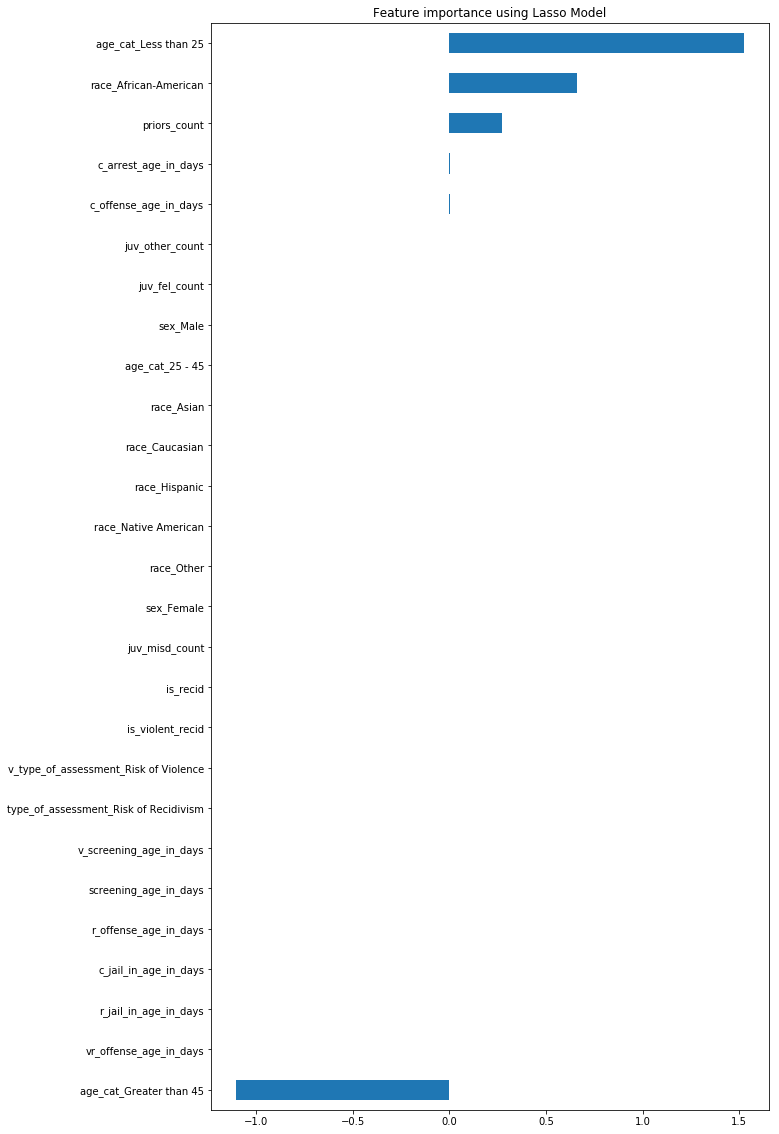

In [83]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 25.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
fig=plt.gcf()
fig.set_size_inches(10,20)
#plt.show()
fig.savefig('Features_importance.png')

In [35]:
## drop all columns except.
#df.drop(df.columns.difference(['a','b']), 1, inplace=True)

In [47]:
coef

sex_Female                               0.000000
sex_Male                                -0.000000
age_cat_25 - 45                         -0.000000
age_cat_Greater than 45                 -1.101874
age_cat_Less than 25                     1.522461
race_African-American                    0.659207
race_Asian                              -0.000000
race_Caucasian                          -0.000000
race_Hispanic                           -0.000000
race_Native American                     0.000000
race_Other                              -0.000000
juv_fel_count                            0.000000
juv_misd_count                           0.000000
juv_other_count                          0.000000
priors_count                             0.273495
is_recid                                 0.000000
is_violent_recid                         0.000000
v_type_of_assessment_Risk of Violence    0.000000
type_of_assessment_Risk of Recidivism    0.000000
c_offense_age_in_days                    0.000423


In [38]:
print(len(coef))

27


In [65]:
filter(lambda a: a != 0, coef)

In [70]:
from collections import OrderedDict, defaultdict
coef_dict = (coef).to_dict()

In [75]:
import collections

sorted_dict = sorted(coef_dict.items(), key=lambda kv: kv[1] ,reverse=True) #OrderedDict(coef_dict)
sorted_dict

[('age_cat_Less than 25', 1.5224613760197312),
 ('race_African-American', 0.659207084352509),
 ('priors_count', 0.27349513326151154),
 ('c_arrest_age_in_days', 0.0007848957403274337),
 ('c_offense_age_in_days', 0.0004228248990604759),
 ('sex_Female', 0.0),
 ('sex_Male', -0.0),
 ('age_cat_25 - 45', -0.0),
 ('race_Asian', -0.0),
 ('race_Caucasian', -0.0),
 ('race_Hispanic', -0.0),
 ('race_Native American', 0.0),
 ('race_Other', -0.0),
 ('juv_fel_count', 0.0),
 ('juv_misd_count', 0.0),
 ('juv_other_count', 0.0),
 ('is_recid', 0.0),
 ('is_violent_recid', 0.0),
 ('v_type_of_assessment_Risk of Violence', 0.0),
 ('type_of_assessment_Risk of Recidivism', 0.0),
 ('v_screening_age_in_days', 0.0),
 ('screening_age_in_days', 0.0),
 ('r_offense_age_in_days', -0.0002285394826513659),
 ('c_jail_in_age_in_days', -0.0007464516061711256),
 ('r_jail_in_age_in_days', -0.0007596714287013613),
 ('vr_offense_age_in_days', -0.0008332912350636671),
 ('age_cat_Greater than 45', -1.1018738954497878)]

In [77]:
 keys = [k for k,v in sorted_dict if v != 0]

In [78]:
keys

['age_cat_Less than 25',
 'race_African-American',
 'priors_count',
 'c_arrest_age_in_days',
 'c_offense_age_in_days',
 'r_offense_age_in_days',
 'c_jail_in_age_in_days',
 'r_jail_in_age_in_days',
 'vr_offense_age_in_days',
 'age_cat_Greater than 45']